In [2]:
!pip install onnxruntime

In [10]:
import onnx
import onnxruntime
from onnx import numpy_helper
import numpy as np 
import os 
import json 
import cv2

In [ ]:
test_img=cv2.imread("dpc_20220218_005_1.bmp")

In [7]:
model=onnx.load("yolo_finger_exp6_F1_0.66.onnx")
onnx.checker.check_model(model)
output=model.graph.output

In [8]:
session=onnxruntime.InferenceSession(model,None)
input_name=session.get_inputs()[0].name
output_name=session.get_outputs()[0].name

TypeError: Unable to load from type '<class 'onnx.onnx_ml_pb2.ModelProto'>'

In [23]:

import json
import sys
import os
import time
import numpy as np
import cv2
import onnx
import onnxruntime
from onnx import numpy_helper
 
model='yolo_finger_exp6_F1_0.66.onnx'
 
#Preprocess the image
img = cv2.imread("dpc_20220218_005_1.bmp")

 
data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')
session = onnxruntime.InferenceSession(model, None)
input_name = session.get_inputs()[0].nam
output_name = session.get_outputs()[0].name
print(input_name)
print(output_name)
 
result = session.run([output_name], {input_name: data})
prediction=int(np.argmax(np.array(result).squeeze(), axis=0))
print(prediction)

AttributeError: 'onnxruntime.capi.onnxruntime_pybind11_state.NodeAr' object has no attribute 'nam'

In [20]:
import numpy as np 
import onnxruntime as ort

In [35]:
img=np.load("dpc_20220218_005_1.npz")
sess_ort=ort.InferenceSession("yolo_finger_exp6_F1_0.66.onnx")
res=sess_ort.run(output_names=[output_tensor.name],input_feed={input_tensor.name: img})
res

NameError: name 'output_tensor' is not defined

In [33]:
from PIL import Image
img=Image.open("dpc_20220218_005_1.bmp").convert("L")
np.savez("dpc_20220218_005_1.npz")

In [36]:
!pip install tensorflow 
!pip install tensorflow-addons

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


In [38]:
!git clone git@github.com:onnx/onnx-tensorflow.git && cd onnx-tensorflow
!pip install tensorflow-probability

Cloning into 'onnx-tensorflow'...


In [40]:
!pip install -e .

ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: C:\Users\JIM\Desktop\yolov5\ONNX\u6a21\u578b\u7d50\u679c\u5132\u5b58


In [2]:
import tensorflow as tf 
import tensorflow_addons as tfa 

In [1]:
import warnings
import onnx
from onnx_tf.backend import prepare


In [3]:
warnings.filterwarnings('ignore') # Ignore all the warning messages in this tutorial
model = onnx.load('yolo_finger_exp6_F1_0.66.onnx') # Load the ONNX file
tf_rep = prepare(model)# Import the ONNX model to Tensorflow

In [4]:
print(tf_rep.inputs) # Input nodes to the model
print('-----')
print(tf_rep.outputs) # Output nodes from the model
print('-----')
print(tf_rep.tensor_dict) # All nodes in the model

['images']
-----
['output', '339', '391', '443']
-----
{}


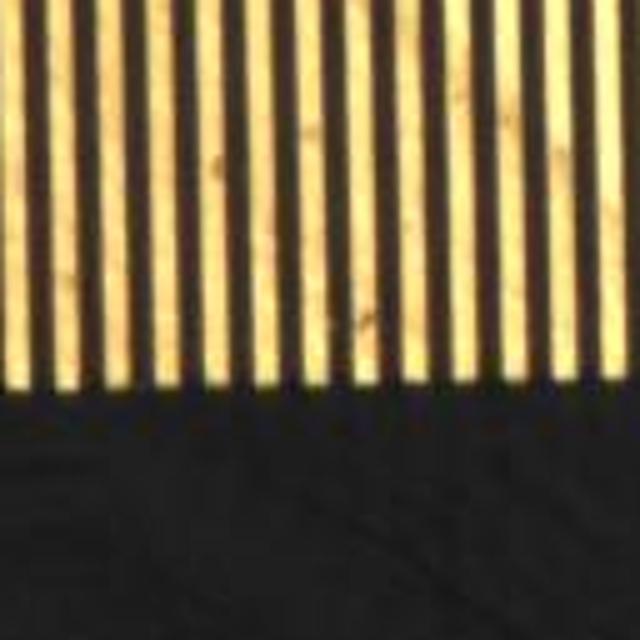

In [15]:
import numpy as np
from IPython.display import display
from PIL import Image

img = Image.open('dpc_20220218_005_1.bmp').resize((640,640))
display(img) # show the image
img_ycbcr = img.convert("YCbCr")
img_y, img_cb, img_cr = img_ycbcr.split()
doggy_y = np.asarray(img_y, dtype=np.float32)[np.newaxis, np.newaxis, :, :]

In [16]:
doggy_y.shape

(1, 1, 640, 640)

In [17]:
big_doggy = tf_rep.run(doggy_y)._0
print(big_doggy.shape)

ValueError: in user code:

    File "c:\users\jim\desktop\onnx-tensorflow\onnx_tf\backend_tf_module.py", line 99, in __call__  *
        output_ops = self.backend._onnx_node_to_tensorflow_op(onnx_node,
    File "c:\users\jim\desktop\onnx-tensorflow\onnx_tf\backend.py", line 347, in _onnx_node_to_tensorflow_op  *
        return handler.handle(node, tensor_dict=tensor_dict, strict=strict)
    File "c:\users\jim\desktop\onnx-tensorflow\onnx_tf\handlers\handler.py", line 59, in handle  *
        return ver_handle(node, **kwargs)
    File "c:\users\jim\desktop\onnx-tensorflow\onnx_tf\handlers\backend\conv.py", line 15, in version_11  *
        return cls.conv(node, kwargs["tensor_dict"])
    File "c:\users\jim\desktop\onnx-tensorflow\onnx_tf\handlers\backend\conv_mixin.py", line 279, in conv  *
        convolved = [

    ValueError: Depth of input (1) is not a multiple of input depth of filter (3) for '{{node convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](transpose_1, split)' with input shapes: [1,644,644,1], [6,6,3,32].
